# Voxel demo

Demonstration of rendering voxel images with matplotlib.

References:
* https://matplotlib.org/stable/gallery/mplot3d/voxels.html

In [4]:
import io

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

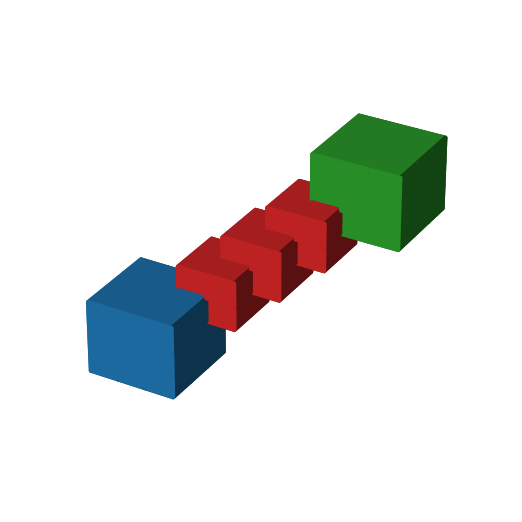

In [5]:
x, y, z = np.indices((8, 8, 8))

cube1 = (x < 3) & (y < 3) & (z < 3)  # noqa: PLR2004
cube2 = (x >= 5) & (y >= 5) & (z >= 5)  # noqa: PLR2004
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2  # noqa: PLR2004

voxelarray = cube1 | cube2 | link

colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = "tab:red"
colors[cube1] = "tab:blue"
colors[cube2] = "tab:green"

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(2, 2), dpi=300)
ax.axis("off")
ax.voxels(voxelarray, facecolors=colors, edgecolors=colors);
# ax.voxels(voxelarray, facecolors=colors, edgecolors="k");

# Corner detections

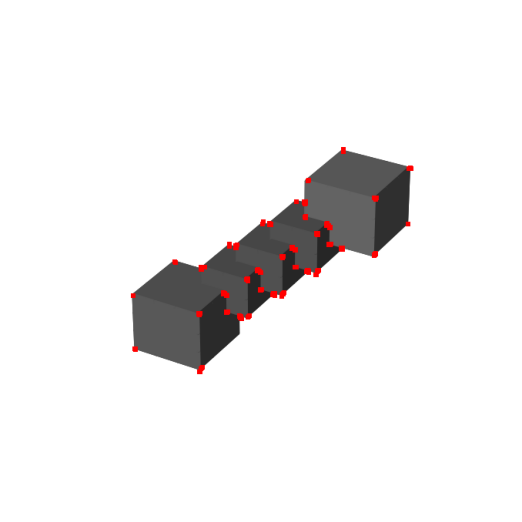

In [7]:
buffer = io.BytesIO()
fig.savefig(buffer, format="png", dpi=300)
buffer.seek(0)

image = cv.imdecode(np.frombuffer(buffer.read(), dtype="u1"), flags=cv.IMREAD_COLOR)
gray = cv.cvtColor(image, code=cv.COLOR_BGR2GRAY).astype("f4")

dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, cv.getStructuringElement(cv.MORPH_RECT, (6, 6)))

gray_highlight = np.repeat(gray[..., np.newaxis], 3, -1).astype("u1")
gray_highlight[dst > 1e-4 * dst.max()] = [255, 0, 0]


_, ax = plt.subplots(figsize=(2, 2), dpi=300)
ax.axis("off")
ax.imshow(gray_highlight);